[Regresja Liniowa Cwiczenia ZDDATAPOL44.ipynb](https://colab.research.google.com/drive/1A3AMmvLuZuLzSQXbH-SQxL40BiT1gJSd#scrollTo=4BCVD6cPqjL6)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
# from google.colab import files
# import io

In [4]:
# uploaded = files.upload()

In [5]:
# Wczytajmy dane
# df = pd.read_csv(io.BytesIO(uploaded['bike_day.csv']))
# df.head(5)

In [4]:
df = pd.read_csv('bike_day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Przypisz atemp jako zmienną niezależną i cnt jako zmienną zależną
# atemp -> temperatura odczuwalna danego dnia, według dokumentacji zmienna została unormalizowana i ustandaryzowana, więc nie zdziwcie się, że wartości będą bardzo małe (między 0 i 1)
# cnt -> ilość wypożyczonych rowerów danego dnia

X = df[["atemp"]].values
y = df[["cnt"]].values

X = np.column_stack(([1]*len(X), X)) # technikalia-zostawcie:)

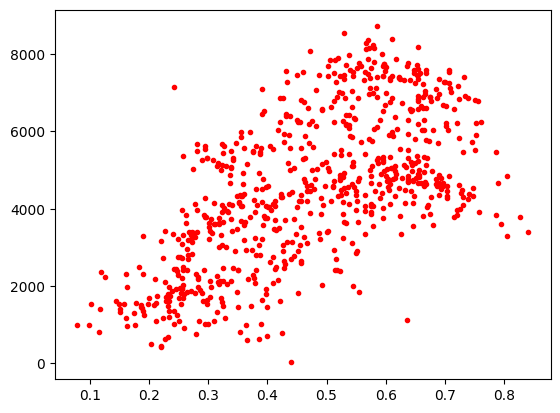

In [10]:
# Stwórz wykres porównujący atemp z cnt
# Zaczynam od losowych wartosc theta0=10000 i theta1=500
plt.plot(df["atemp"], df["cnt"], 'r.')
plt.show()

In [12]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    cost_array = np.empty([numIterations, 2])
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        cost_array[i][0] = i
        cost_array[i][1] = cost
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta, cost_array

In [13]:
# Przy wykorzystaniu powyższej funkcji wyćwicz model (osiągnij minimum funkcji kosztu).
m=len(X)
numIterations= 200
alpha = 0.1
theta = [0,0]

In [14]:
# Narysuj prostą regresji na wykresie z naszymi obserwacjami
# Przy wykorzystaniu powyższej funkcji wyćwicz model (osiągnij minimum funkcji kosztu).
theta, cost_array = gradientDescent(X, y, theta, alpha, m, numIterations)
print(theta)

Iteration 0 | Cost: 8785455108.500000


ValueError: operands could not be broadcast together with shapes (2,) (2,731) 

In [ ]:
# Stwórz predykcję ilości wypożyczony rowerów na dzień, w którym znormalizowana temperatura odczuwalna wynosi 0.8

predicted_price = theta[0] + theta[1]* 0.8
predicted_price

### A teraz w ScikitLearn

In [21]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
# Jako zmienną zależną wybierzmy ponownie CNT, jako niezależne atemp, hum, windspeed i workingday (wszystkie cztery na raz)
X = df[['temp','atemp','hum','windspeed']]
y = df[["cnt"]]

In [24]:
# Wytrenuj model
lr = LinearRegression().fit(X,y)


In [26]:
# Sprawdź wielkość interceptu i współczynników regresji
lr.intercept_

array([3860.36845321])

In [29]:
lr.coef_

array([[ 2111.81363872,  5139.15244296, -3149.10975167, -4528.67482854]])

In [ ]:
# Stwórz predykcję ilości wypożyczonych rowerów w dzień gdzie atemp=0.5, hum=0.3, windspeed=0.25 w dzień pracujący. Może wyskoczyć warning, pomińmy go ;)

In [31]:
lr.predict([[0.5,0.3,0.25,1]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1142.068739]])

### Regresja Wielomianowa

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Przypisz atemp jako zmienną niezależną i cnt jako zmienną zależną


In [ ]:
# Formatowanie zmiennej niezależnej


In [ ]:
# Wytrenuj model regresji wielomianowej


In [ ]:
# Sprawdź wielkość interceptu i współczynników regresji


In [ ]:
# Stwórz predykcję ilości wypożyczony rowerów na dzień, w którym unormalizowana temperatura odczuwalna wynosi 0.8

In [ ]:
# Narysuj wykres regresji wielomianowej na wykresie z naszymi obserwacjami
